In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

In [21]:

df = pd.read_csv(r"E:\tri tue nhan tao trong maketing\bai tap cuoi ki\dataset_cleaned.csv")


In [22]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [40]:
print("Số dòng:", df.shape[0])
print("Số cột:", df.shape[1])


Số dòng: 113999
Số cột: 21


In [41]:
print("Tên các cột:", df.columns.tolist())

Tên các cột: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [24]:
df.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113999.000000,113999,113999,113999,113999,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,...,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999
unique,NaN,89740,31437,46589,73608,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.421925,NaN,NaN,NaN,NaN,33.238827,2.280312e+05,0.085501,0.566801,0.641383,...,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,NaN
std,32909.243463,NaN,NaN,NaN,NaN,22.304959,1.072961e+05,0.279627,0.173543,0.251530,...,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,0.000000,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.500000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,0.000000,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,NaN
50%,56999.000000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,0.000000,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.500000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,0.000000,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


In [25]:
# Đếm số lượng nghệ sĩ duy nhất trong tập dữ liệu và số lượng bài hát của từng nghệ sĩ
print(df['artists'].unique().shape)
print(df['artists'].value_counts())

(31437,)
artists
The Beatles                           279
George Jones                          271
Stevie Wonder                         236
Linkin Park                           224
Ella Fitzgerald                       222
                                     ... 
Hillsong Worship;TAYA;David Ware        1
for KING & COUNTRY;Andy Mineo           1
Bethel Music;Francesca Battistelli      1
Descansa                                1
Jesus Culture                           1
Name: count, Length: 31437, dtype: int64


In [26]:
# Sắp xếp các biến theo thứ tự giảm dần theo giá trị còn thiếu của chúng
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [27]:
# Hiển thị các hàng có giá trị thiếu trong artists
print(df[df['artists'].isnull()])


Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [28]:
# Xử lí dữ liệu thiếu bằng cách loại bỏ các hàng có giá trị thiếu
df_cleaned = df.dropna(subset=['artists'])
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  int64  
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [29]:
# kiểm tra dữ liệu trùng lặp
duplicate_rows = df_cleaned[df_cleaned.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [30]:
# Kiểm tra dự liệu ngoại lai
df_cleaned.describe(include='all')

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113999.000000,113999,113999,113999,113999,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,...,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999
unique,NaN,89740,31437,46589,73608,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114
top,NaN,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,acoustic
freq,NaN,9,279,195,151,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,56999.421925,NaN,NaN,NaN,NaN,33.238827,2.280312e+05,0.085501,0.566801,0.641383,...,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,NaN
std,32909.243463,NaN,NaN,NaN,NaN,22.304959,1.072961e+05,0.279627,0.173543,0.251530,...,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,8.586000e+03,0.000000,0.000000,0.000000,...,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,28499.500000,NaN,NaN,NaN,NaN,17.000000,1.740660e+05,0.000000,0.456000,0.472000,...,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,NaN
50%,56999.000000,NaN,NaN,NaN,NaN,35.000000,2.129060e+05,0.000000,0.580000,0.685000,...,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,NaN
75%,85499.500000,NaN,NaN,NaN,NaN,50.000000,2.615060e+05,0.000000,0.695000,0.854000,...,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,NaN


In [31]:
# Hiển thị mô tả thuộc tính Explicit
print(df_cleaned['explicit'].value_counts())

explicit
0    104252
1      9747
Name: count, dtype: int64


In [32]:
# Chuẩn hóa dữ liệu cho cột 'explicit' (0 và 1)
df_cleaned['explicit'] = df_cleaned['explicit'].apply(lambda x: 1 if x == True else 0)
print(df_cleaned['explicit'].value_counts())

explicit
0    104252
1      9747
Name: count, dtype: int64


In [37]:
# Lưu dữ liệu đã làm sạch vào file mới
df_cleaned.to_csv(r"E:\tri tue nhan tao trong maketing\bai tap cuoi ki\newdataset.csv", index=False)

### Ngô Bá Quân - phân tích, phân bố và thống kê mô tả

In [38]:
# Chọn các cột đặc trưng âm nhạc chính
features = ['tempo', 'energy', 'valence', 'popularity']

# Thống kê mô tả
stats = df[features].describe().T
print("Thống kê mô tả các đặc trưng âm nhạc:")
display(stats)

# Thêm tính trung bình và độ lệch chuẩn riêng lẻ
mean_values = df[features].mean()
std_values = df[features].std()
print("\nGiá trị trung bình:")
print(mean_values)
print("\nĐộ lệch chuẩn:")
print(std_values)


Thống kê mô tả các đặc trưng âm nhạc:


,count,mean,std,min,25%,50%,75%,max
tempo,113999.0,122.147695,29.978290,0.0,99.2185,122.017,140.071,243.372
energy,113999.0,0.641383,0.251530,0.0,0.4720,0.685,0.854,1.000
valence,113999.0,0.474066,0.259261,0.0,0.2600,0.464,0.683,0.995
popularity,113999.0,33.238827,22.304959,0.0,17.0000,35.000,50.000,100.000



Giá trị trung bình:
tempo         122.147695
energy          0.641383
valence         0.474066
popularity     33.238827
dtype: float64

Độ lệch chuẩn:
tempo         29.978290
energy         0.251530
valence        0.259261
popularity    22.304959
dtype: float64


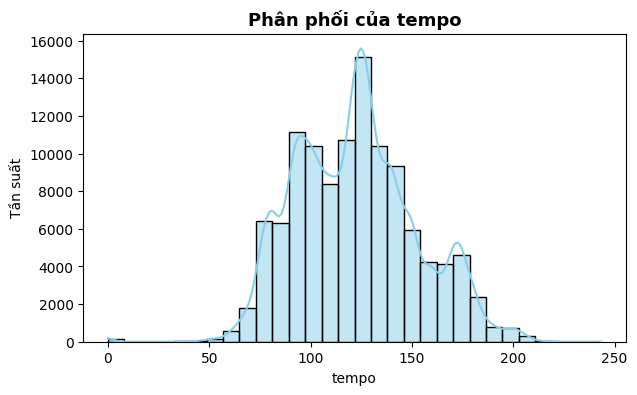

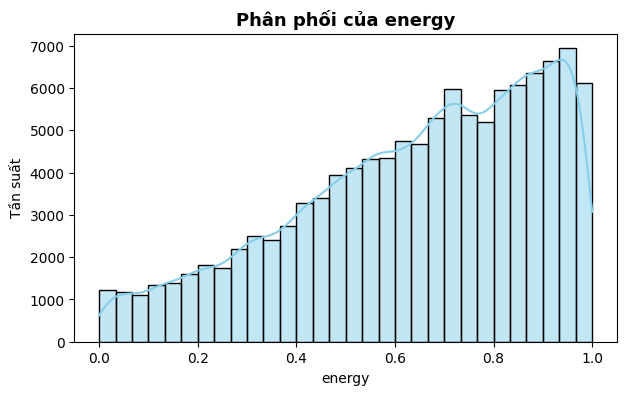

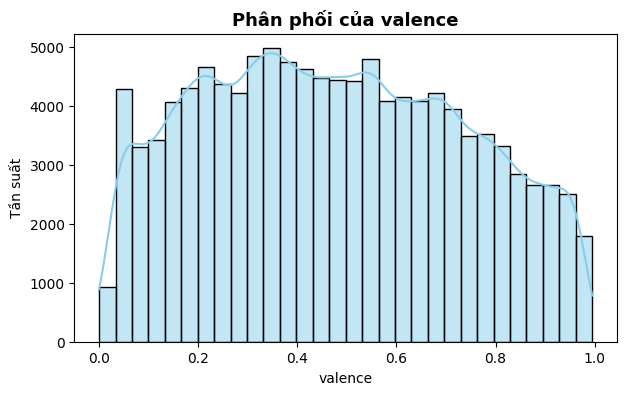

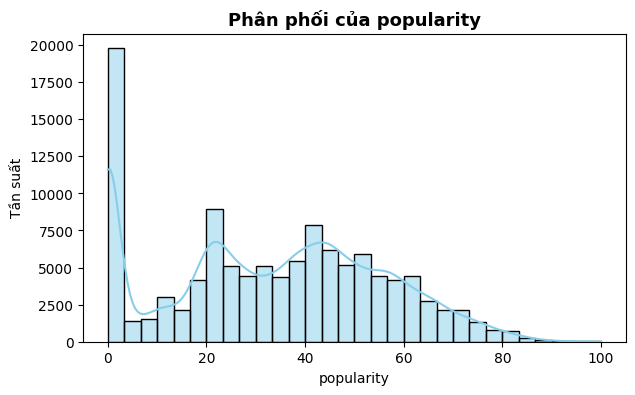

In [39]:
# Vẽ phân phối cho từng đặc trưng
for col in features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Phân phối của {col}', fontsize=13, weight='bold')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.show()


### Nhận xét:
1. tempo: phần lớn bài hát có tempo trung bình khoảng 110–130 BPM → phổ biến ở nhạc Pop/Dance.
2. energy: phân phối lệch phải → đa số bài hát có năng lượng trung bình.
3. valence: phân phối rộng → nhiều bài hát có cảm xúc trung lập hoặc buồn nhẹ.
4. popularity: phân phối lệch trái → chỉ một số ít bài hát thực sự phổ biến.

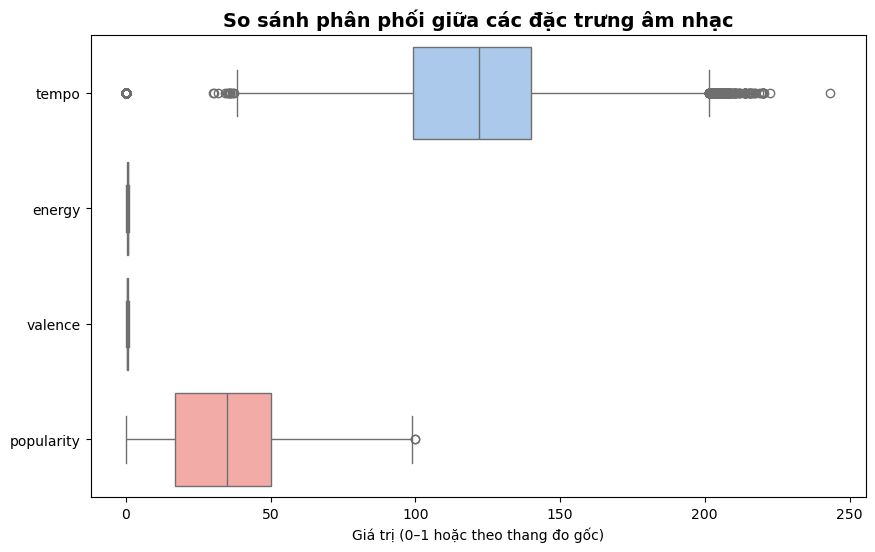

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[features], orient="h", palette="pastel")
plt.title("So sánh phân phối giữa các đặc trưng âm nhạc", fontsize=14, weight='bold')
plt.xlabel("Giá trị (0–1 hoặc theo thang đo gốc)")
plt.show()


1. valence và energy có phân phối khá rộng → thể hiện sự đa dạng trong phong cách âm nhạc.
2. popularity có nhiều outlier → một số bài hát cực kỳ phổ biến vượt trội.

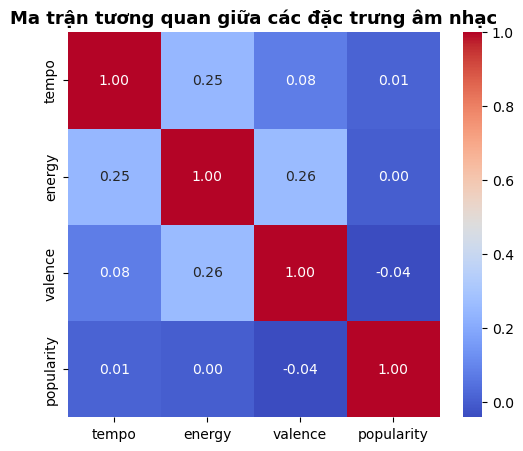

In [23]:
plt.figure(figsize=(6,5))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các đặc trưng âm nhạc", fontsize=13, weight='bold')
plt.show()


1. energy và valence thường có tương quan dương nhẹ → bài hát năng lượng cao thường mang cảm xúc tích cực hơn.
2. popularity có thể không tương quan mạnh với bất kỳ feature nào → chứng tỏ yếu tố “phổ biến” còn phụ thuộc vào yếu tố ngoài âm nhạc (marketing, nghệ sĩ,…).

### Mã hóa dữ liệu dạng chuỗi (Label Encoding)

In [44]:
label_artist = LabelEncoder()
label_genre = LabelEncoder()

In [45]:
df['artist_encoded'] = label_artist.fit_transform(df['artists'].fillna('Unknown').astype(str))
df['genre_encoded']  = label_genre.fit_transform(df['track_genre'].fillna('Unknown').astype(str))


In [46]:
df[['artists', 'artist_encoded', 'track_genre', 'genre_encoded']].head()


,artists,artist_encoded,track_genre,genre_encoded
0,Gen Hoshino,10357,acoustic,0
1,Ben Woodward,3287,acoustic,0
2,Ingrid Michaelson;ZAYN,12397,acoustic,0
3,Kina Grannis,14839,acoustic,0
4,Chord Overstreet,5255,acoustic,0


### Nhận xét
Cột artist_name và genre đã được mã hóa thành dạng số (artist_encoded, genre_encoded) giúp mô hình dễ dàng xử lý hơn.

Ví dụ: “Ed Sheeran” → 105, “Pop” → 2.

Đây là bước quan trọng trong pipeline vì mô hình máy học không thể xử lý trực tiếp dữ liệu dạng text.

### Chuẩn hóa dữ liệu số (MinMaxScaler)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
num_cols = ['tempo', 'energy', 'valence', 'danceability', 
            'loudness', 'acousticness', 'instrumentalness', 
            'speechiness', 'liveness', 'popularity', 'duration_ms']

df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].describe()

,tempo,energy,valence,danceability,loudness,acousticness,instrumentalness,speechiness,liveness,popularity,duration_ms
count,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,0.501897,0.641383,0.476448,0.575432,0.763407,0.316171,0.156051,0.087723,0.213554,0.332388,0.041969
std,0.123179,0.251530,0.260564,0.176186,0.093028,0.333858,0.309556,0.109568,0.190378,0.223050,0.020521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407682,0.472000,0.261307,0.462944,0.730962,0.016968,0.000000,0.037202,0.098000,0.170000,0.031648
50%,0.501360,0.685000,0.466332,0.588832,0.786619,0.169679,0.000042,0.050674,0.132000,0.350000,0.039077
75%,0.575543,0.854000,0.686432,0.705584,0.823632,0.599900,0.049000,0.087565,0.273000,0.500000,0.048371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Nhận xét:

Tất cả các đặc trưng âm nhạc số đã được chuẩn hóa về khoảng [0, 1], đảm bảo các đặc trưng có trọng số tương đương khi tính toán độ tương đồng.

Điều này đặc biệt quan trọng trong Content-based filtering vì mô hình dựa vào khoảng cách giữa các điểm dữ liệu.

Không chuẩn hóa có thể khiến các cột như duration_ms (có giá trị lớn) chi phối kết quả tính toán.

### Tính ma trận tương quan & Vẽ Heatmap

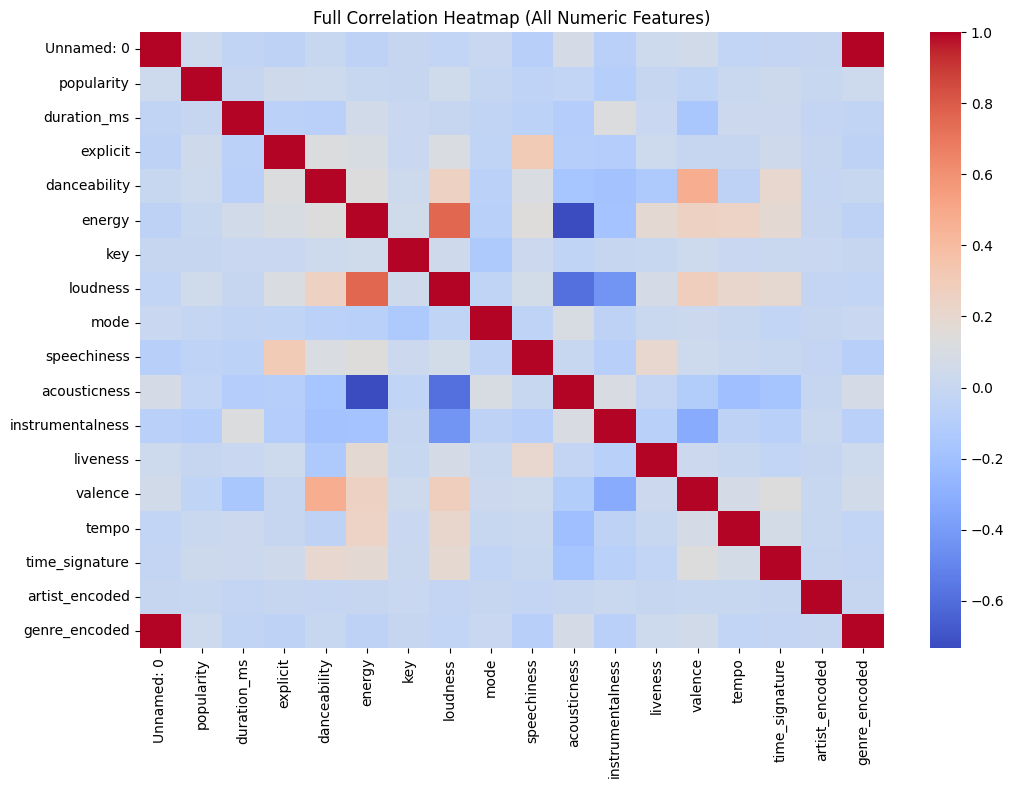

In [49]:
#  Ma trận tương quan toàn bộ dữ liệu số
corr_full = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_full, cmap="coolwarm", annot=False)
plt.title("Full Correlation Heatmap (All Numeric Features)")
plt.show()

####  Ma trận tương quan toàn bộ đặc trưng số (Full Correlation Heatmap)

- Ma trận tương quan tổng thể cho thấy đa số các đặc trưng có **tương quan yếu đến trung bình**, thể hiện bằng màu nhạt gần trung tính. Điều này cho thấy nhiều đặc trưng tương đối độc lập và có thể mang thông tin riêng biệt khi đưa vào mô hình.
- Một số cặp đặc trưng nổi bật có tương quan mạnh:
  - **`energy` ↔ `loudness` ≈ 0.76 (thuận mạnh):** bài hát năng lượng cao thường có âm lượng lớn hơn.
  - **`energy` ↔ `acousticness` ≈ -0.73 (nghịch mạnh):** nhạc acoustic thường có năng lượng thấp, trong khi nhạc điện tử hoặc rock có năng lượng cao hơn.
  - **`loudness` ↔ `acousticness` ≈ -0.59 (nghịch trung bình mạnh):** nhạc acoustic thường có âm lượng nhỏ hơn.
- Các cột như `artist_encoded` hay `genre_encoded` chỉ là nhãn mã hóa nên hệ số tương quan của chúng không có nhiều ý nghĩa âm học.
- Biến `popularity` có tương quan thấp với các đặc trưng âm học, gợi ý rằng độ phổ biến của bài hát không chỉ phụ thuộc vào đặc điểm âm nhạc mà còn bị chi phối bởi yếu tố bên ngoài như thời gian phát hành, nghệ sĩ hay xu hướng thị trường.


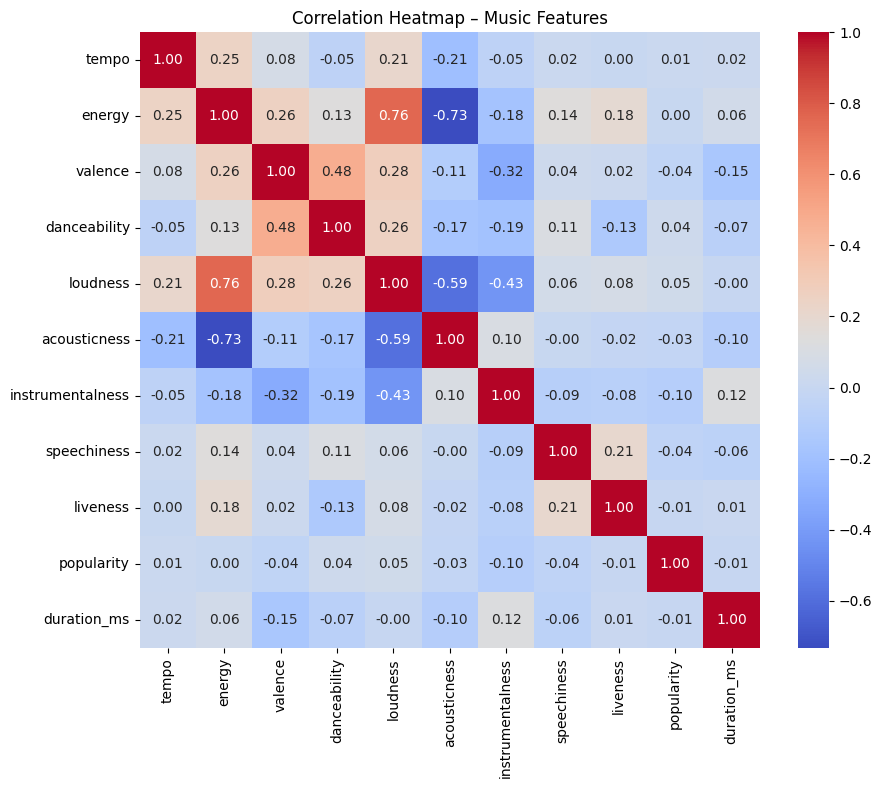

In [50]:
# Ma trận tương quan nhóm đặc trưng âm nhạc chính
music_features = ['tempo', 'energy', 'valence', 'danceability', 
                  'loudness', 'acousticness', 'instrumentalness', 
                  'speechiness', 'liveness', 'popularity', 'duration_ms']

corr_music = df[music_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_music, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap – Music Features")
plt.show()

####  Ma trận tương quan nhóm đặc trưng âm nhạc chính

Khi chỉ tập trung vào các đặc trưng âm nhạc cốt lõi (`tempo`, `energy`, `valence`, `danceability`, `loudness`, `acousticness`, `instrumentalness`, `speechiness`, `liveness`, `popularity`, `duration_ms`), các mối quan hệ thể hiện rõ ràng và có ý nghĩa hơn:

- **`energy` ↔ `loudness` ≈ 0.76 (thuận rất mạnh):** xác nhận rằng các bài hát sôi động có âm lượng cao hơn – điều quan trọng khi mô hình hóa phong cách nhạc.  
- **`energy` ↔ `acousticness` ≈ -0.73 (nghịch mạnh):** đặc trưng quan trọng để phân tách nhạc acoustic với nhạc điện tử/rock.  
- **`valence` ↔ `danceability` ≈ 0.48 (thuận trung bình):** bài hát có cảm xúc tích cực thường dễ nhảy – gợi ý tiềm năng để xây dựng hệ thống gợi ý dựa trên tâm trạng người dùng.  
- **`loudness` ↔ `instrumentalness` ≈ -0.43 (nghịch trung bình):** các bản nhạc không lời có xu hướng âm lượng thấp hơn.  
- **`valence` ↔ `instrumentalness` ≈ -0.32 (nghịch):** các bài instrumental thường có cảm xúc trung tính hoặc trầm hơn.

Ngoài ra, biến `popularity` tiếp tục thể hiện tương quan yếu với các đặc trưng âm nhạc, cho thấy cần thêm yếu tố bổ trợ nếu muốn dự đoán độ phổ biến của bài hát.



####  Kết luận và ý nghĩa đối với mô hình gợi ý

- Các đặc trưng có tương quan quá cao (đặc biệt là `energy` và `loudness`) có thể gây **đa cộng tuyến**, do đó chỉ nên giữ **một trong hai** khi xây dựng vector đặc trưng để mô hình hoạt động ổn định hơn.
- Các đặc trưng như `valence`, `danceability`, `acousticness` và `energy` mang thông tin quan trọng giúp mô hình hiểu rõ hơn về cảm xúc, phong cách và cấu trúc âm nhạc của bài hát.
- Phân tích tương quan là bước quan trọng để **loại bỏ đặc trưng trùng lặp**, **chọn biến hữu ích** và **định hướng xây dựng hệ thống gợi ý nhạc theo tâm trạng và sở thích người dùng** ở các bước tiếp theo.

 **Tóm lại**, việc phân tích ma trận tương quan không chỉ giúp chúng ta hiểu rõ mối quan hệ giữa các đặc trưng âm nhạc mà còn đóng vai trò nền tảng để thiết kế vector đặc trưng và tối ưu hóa mô hình gợi ý trong các tuần sau.

### Trích xuất Top 7 mối tương quan mạnh nhất

In [51]:
#  Trích xuất top 7 mối tương quan mạnh nhất
corr_pairs = (
    corr_music.where(np.triu(np.ones(corr_music.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
)

top7 = corr_pairs.reindex(corr_pairs.Correlation.abs().sort_values(ascending=False).index).head(7)
top7


,Feature A,Feature B,Correlation
12,energy,loudness,0.761690
13,energy,acousticness,-0.733908
34,loudness,acousticness,-0.589804
19,valence,danceability,0.477347
35,loudness,instrumentalness,-0.433478
22,valence,instrumentalness,-0.324310
20,valence,loudness,0.279851


###  Top 7 mối tương quan mạnh nhất giữa các đặc trưng âm nhạc

Bảng dưới đây thể hiện 7 cặp đặc trưng có mối tương quan tuyến tính mạnh nhất trong tập dữ liệu Spotify. Các hệ số tương quan dương gần 1 thể hiện mối quan hệ thuận mạnh, trong khi các giá trị âm gần -1 thể hiện mối quan hệ nghịch mạnh.

| Feature A           | Feature B           | Correlation | Nhận xét ý nghĩa |
|---------------------|---------------------|--------------|------------------|
| `energy`           | `loudness`          | **0.7617**   | Mối tương quan thuận rất mạnh: các bài hát có năng lượng cao thường có âm lượng lớn. Điều này phản ánh đặc tính tự nhiên của nhạc sôi động như EDM, pop hay rock. |
| `energy`           | `acousticness`      | **-0.7339**  | Mối tương quan nghịch rất mạnh: nhạc acoustic thường có năng lượng thấp, ngược lại nhạc điện tử hoặc rock có năng lượng cao hơn. |
| `loudness`         | `acousticness`      | **-0.5898**  | Mối tương quan nghịch trung bình mạnh: nhạc acoustic thường được ghi âm với âm lượng nhỏ hơn. |
| `valence`          | `danceability`      | **0.4773**   | Mối tương quan thuận trung bình: bài hát có cảm xúc tích cực thường dễ nhảy hơn. Đây là yếu tố quan trọng để mô hình gợi ý nhạc theo tâm trạng người dùng. |
| `loudness`         | `instrumentalness`  | **-0.4335**  | Mối tương quan nghịch trung bình: nhạc không lời có xu hướng có âm lượng thấp hơn các bài hát có lời. |
| `valence`          | `instrumentalness`  | **-0.3243**  | Mối tương quan nghịch: nhạc instrumental có xu hướng mang cảm xúc trung tính hoặc trầm hơn. |
| `valence`          | `loudness`          | **0.2799**   | Mối tương quan thuận yếu: bài hát có cảm xúc tích cực thường được sản xuất với âm lượng lớn hơn đôi chút. |

---

#### 📊 Nhận xét tổng quát:

- Nhóm đặc trưng **`energy` – `loudness` – `acousticness`** thể hiện mối liên hệ rất mạnh, phản ánh rõ rệt sự khác biệt giữa các thể loại nhạc sôi động và nhạc mộc.  
- Cặp **`valence` – `danceability`** là đặc trưng quan trọng để gợi ý nhạc dựa trên tâm trạng và trải nghiệm người dùng.  
- Các mối tương quan âm cho thấy các đặc điểm như “mức độ acoustic” hay “instrumentalness” thường đối lập với “năng lượng” và “âm lượng” – điều này có thể khai thác để mô hình phân tách các dòng nhạc khác nhau.  
- Một số đặc trưng có tương quan cao (**> 0.7**) như `energy` và `loudness` có thể gây đa cộng tuyến, nên cân nhắc chọn lọc khi xây dựng mô hình.

---

🎯 **Kết luận:**  
Phân tích top 7 mối tương quan mạnh nhất giúp xác định rõ các mối quan hệ cốt lõi giữa các đặc trưng âm nhạc. Kết quả này không chỉ hỗ trợ việc lựa chọn đặc trưng đầu vào mà còn cung cấp thông tin quan trọng để xây dựng mô hình gợi ý nhạc hiệu quả, chính xác và phù hợp với sở thích người dùng trong các bước tiếp theo.



# 📊 Phân tích theo **thể loại & ca sĩ** (dùng cột thật trong `dataset_cleaned.csv`)

**Cột sử dụng:**  
- `track_genre` (thể loại)  
- `artists` (ca sĩ)  
- `track_name` (tên bài hát)  
- `popularity` (độ phổ biến)

**Mục tiêu:**  
- Thống kê số lượng bài hát theo **thể loại** và **ca sĩ**.  
- Tính **độ phổ biến trung bình** cho từng nhóm.  
- Vẽ **biểu đồ** minh hoạ Top 10.  

> Ghi chú: chỉ dùng **matplotlib** (không seaborn). Đặt `dataset_cleaned.csv` cùng thư mục với notebook.
---



## 1) Kiểm tra cột và tiền xử lý nhẹ


In [52]:

# %% [code] Kiểm tra cột bắt buộc
required_cols = ["track_name", "artists", "track_genre", "popularity"]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Thiếu cột: {missing}. Cần có {required_cols}")

# Ép popularity về số & loại bỏ NA quan trọng
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
before = len(df)
df = df.dropna(subset=["artists", "track_genre", "popularity"])
print("Dropped:", before - len(df), "rows")
df.sample(min(5, len(df)))


Dropped: 0 rows


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artist_encoded,genre_encoded
1216,1216,6DU07zLVPOlPqqybYpQZDn,La Misa Negra,La Misa Negra,Dueña de Mi,0.25,0.033398,0,0.595939,0.686,...,0.126425,0.004297,0.007050,0.0428,0.713568,0.755789,4,afrobeat,15356,1
107230,107231,7wnagOAqma4Sg6JOGjWr5R,Alphaville,Forever Young (Super Deluxe Edition; 2019 Rema...,Big in Japan - 2019 Remaster,0.65,0.052793,0,0.768528,0.596,...,0.035130,0.041064,0.044700,0.1710,0.195980,0.401727,4,synth-pop,1298,107
101221,101222,5d0E028QDORq2Qm7JdwU0Q,Weißes Rauschen HD,Weißer Lärm Baby Schlaf (Meeresrauschen),Baby Schlafhilfe mit Meeresrauschen,0.46,0.032688,0,0.081117,0.507,...,0.055440,0.767068,0.988000,0.8610,0.000010,0.349872,4,sleep,29539,101
103431,103432,7LDUYbTYPRIRlGwjITha45,Jamie Miller,Coffee Moment,Here's Your Perfect,0.00,0.028689,0,0.566497,0.454,...,0.057098,0.501004,0.000000,0.1460,0.426131,0.464803,4,soul,12884,103
39859,39859,4fkFsB17kyzq27QhOVt19V,Neptunica;Matthew Clanton,Love Is Gone,Love Is Gone,0.65,0.028555,0,0.638579,0.815,...,0.070777,0.016064,0.000153,0.2360,0.185930,0.624616,4,german,19780,39



## 2) Phân tích **thể loại (track_genre)**
### 2.1 Thống kê số lượng bài hát & độ phổ biến trung bình


In [53]:

# %% [code] GroupBy theo thể loại
genre_stats = (
    df.groupby("track_genre")
      .agg(song_count=("track_name", "count"), avg_popularity=("popularity", "mean"))
      .reset_index()
      .sort_values("song_count", ascending=False)
)
genre_stats.head(10)


,track_genre,song_count,avg_popularity
0,acoustic,1000,0.42483
1,afrobeat,1000,0.24399
2,alt-rock,1000,0.33943
3,alternative,1000,0.24337
4,ambient,1000,0.44191
5,anime,1000,0.48772
6,black-metal,1000,0.22449
7,bluegrass,1000,0.25676
8,blues,1000,0.31188
9,brazil,1000,0.44670



### 2.2 Biểu đồ: Top 10 thể loại nhiều bài hát nhất


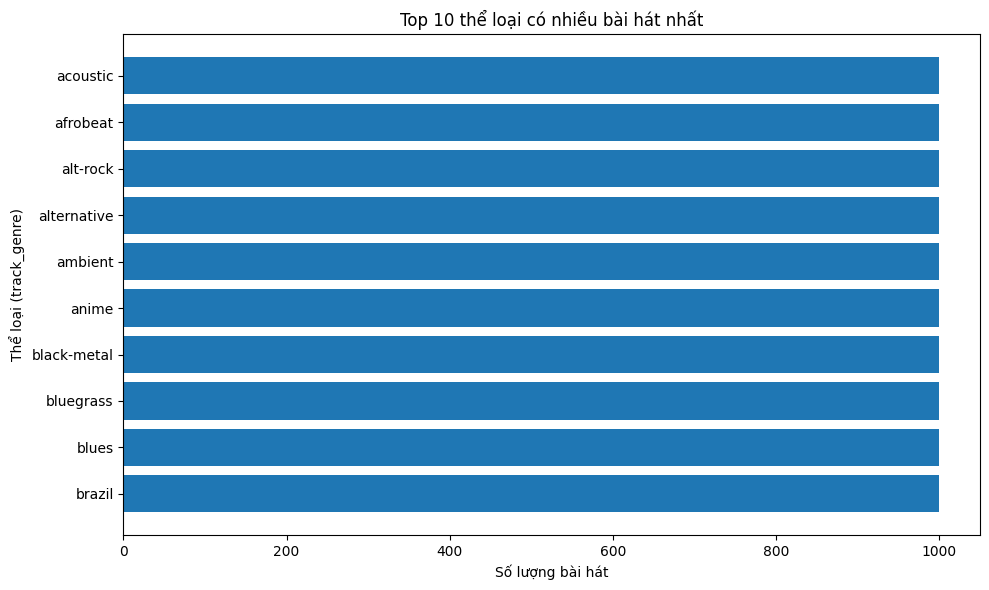

In [54]:

# %% [code]
top_genres_count = genre_stats.nlargest(10, "song_count").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_genres_count["track_genre"], top_genres_count["song_count"])
plt.title("Top 10 thể loại có nhiều bài hát nhất")
plt.xlabel("Số lượng bài hát")
plt.ylabel("Thể loại (track_genre)")
plt.tight_layout()
plt.show()



### 2.3 Biểu đồ: Top 10 thể loại có độ phổ biến trung bình cao nhất


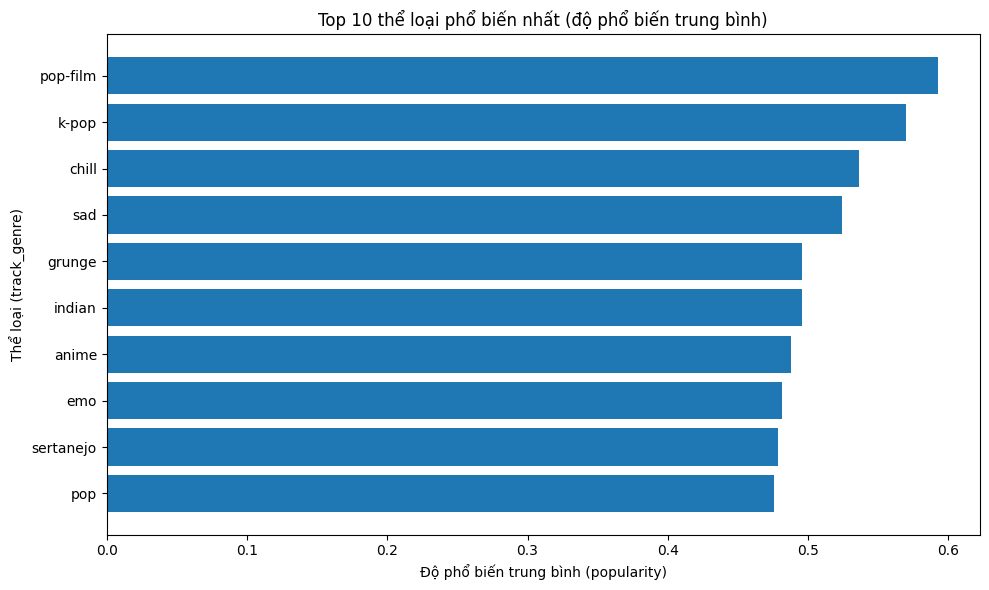

In [55]:

# %% [code]
top_genres_pop = genre_stats.nlargest(10, "avg_popularity").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_genres_pop["track_genre"], top_genres_pop["avg_popularity"])
plt.title("Top 10 thể loại phổ biến nhất (độ phổ biến trung bình)")
plt.xlabel("Độ phổ biến trung bình (popularity)")
plt.ylabel("Thể loại (track_genre)")
plt.tight_layout()
plt.show()



> **Nhận xét (Genre):**  
> - Một số `track_genre` có **nhiều bài hát** nhất phản ánh mức độ phủ rộng của thể loại đó trong dataset.  
> - **Độ phổ biến trung bình (avg_popularity)** cho thấy mức độ yêu thích — có thể khác thứ hạng theo số lượng.  
> - Nếu cần gợi ý cho người dùng mới, có thể ưu tiên các thể loại có `avg_popularity` cao.



## 3) Phân tích **ca sĩ (artists)**
### 3.1 Thống kê số lượng bài hát & độ phổ biến trung bình


In [57]:

# %% [code]
artist_stats = (
    df.groupby("artists")
      .agg(song_count=("track_name", "count"), avg_popularity=("popularity", "mean"))
      .reset_index()
      .sort_values("song_count", ascending=False)
)
artist_stats.head(10)


,artists,song_count,avg_popularity
26983,The Beatles,279,0.610072
10418,George Jones,271,0.165055
26009,Stevie Wonder,236,0.010636
16049,Linkin Park,224,0.560714
8587,Ella Fitzgerald,222,0.007342
21810,Prateek Kuhad,217,0.463318
9306,Feid,202,0.100842
5417,Chuck Berry,190,0.078737
12000,Håkan Hellström,183,0.314863
20555,OneRepublic,181,0.308619



### 3.2 Biểu đồ: Top 10 ca sĩ có nhiều bài hát nhất


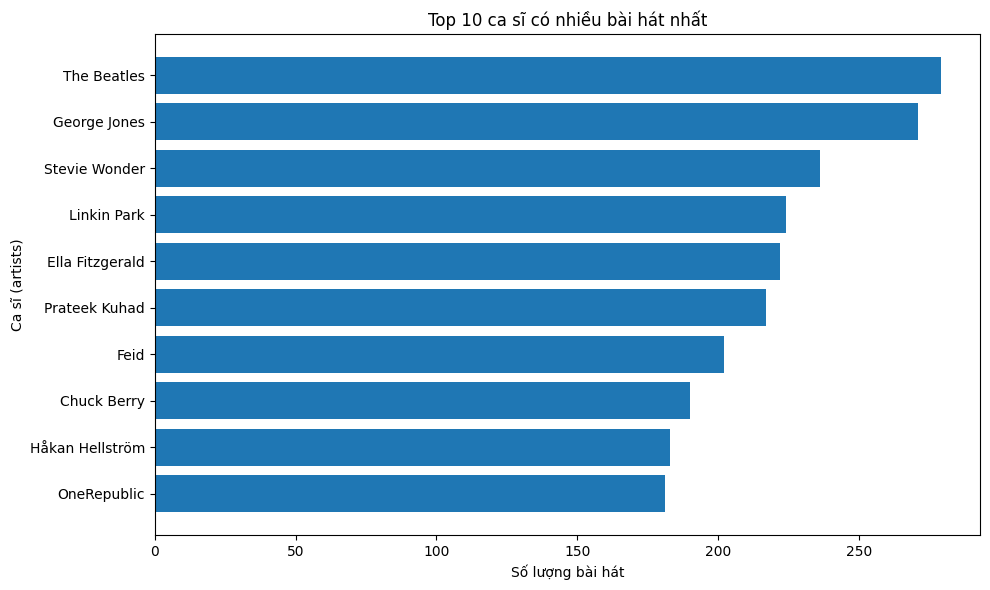

In [58]:

# %% [code]
top_artists_count = artist_stats.nlargest(10, "song_count").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_artists_count["artists"], top_artists_count["song_count"])
plt.title("Top 10 ca sĩ có nhiều bài hát nhất")
plt.xlabel("Số lượng bài hát")
plt.ylabel("Ca sĩ (artists)")
plt.tight_layout()
plt.show()



### 3.3 Biểu đồ: Top 10 ca sĩ có độ phổ biến trung bình cao nhất


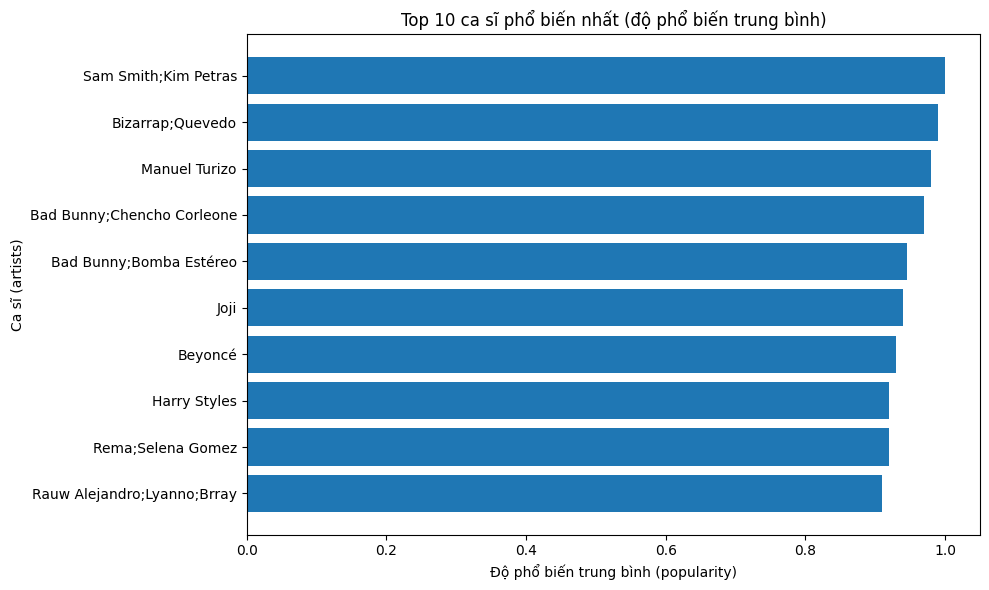

In [60]:

# %% [code]
top_artists_pop = artist_stats.nlargest(10, "avg_popularity").iloc[::-1]
plt.figure(figsize=(10,6))
plt.barh(top_artists_pop["artists"], top_artists_pop["avg_popularity"])
plt.title("Top 10 ca sĩ phổ biến nhất (độ phổ biến trung bình)")
plt.xlabel("Độ phổ biến trung bình (popularity)")
plt.ylabel("Ca sĩ (artists)")
plt.tight_layout()
plt.show()



> **Nhận xét (Artist):**  
> - Nghệ sĩ có **nhiều bài hát** thường là những người phát hành nhiều hoặc xuất hiện trong nhiều album/playlist.  
> - Nghệ sĩ có **avg_popularity** cao cho thấy mức độ yêu thích mạnh dù số bài có thể không nhiều.  
> - Hai chiều "số lượng vs yêu thích" hữu ích để xây dựng gợi ý theo nghệ sĩ.



## 4) Kết luận
- Tồn tại chênh lệch giữa **độ phủ (song_count)** và **mức độ yêu thích (avg_popularity)** ở cả thể loại và ca sĩ.  
- Kết quả giúp:
  - Gợi ý bài hát trong **cùng `track_genre`** có avg_popularity cao.  
  - Gợi ý **nghệ sĩ tương tự** dựa trên thống kê theo `artists`.  

> Bạn có thể chép phần nhận xét/kết luận vào báo cáo.
